In [1]:
import osnap
import pickle
import pandas as pd
import numpy as np

# You have to install quilt: pip install quilt
# Also, you have to run: quilt install spatialucr/census

import geopandas as gpd
from quilt.data.spatialucr import census
from shapely.wkb import loads


import osmnx as ox
from fiona.crs import from_epsg
import pycrs

import seaborn as sns

import os
from osnap.data import read_ltdb

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [2]:
df = census.tracts_1990()
df['geometry'] = df.wkb.apply(lambda x: loads(x, hex=True))
df_1990 = gpd.GeoDataFrame(df)

In [3]:
df_1990.head()

,geoid,index,wkb,geometry
0,01023009567,None,0103000000010000007B070000DC9C4A06801A56C08C85...,"POLYGON ((-88.414064 32.179518, -88.414226 32...."
1,01023009568,None,010300000001000000F6090000A3E5400FB51456C02462...,"POLYGON ((-88.32355099999999 32.02982, -88.324..."
2,01023009569,None,0103000000010000008B040000840EBA84431D56C001C1...,"POLYGON ((-88.457246 31.81052, -88.458158 31.8..."
3,01023009570,None,01030000000100000082020000FA7C9411170C56C00E88...,"POLYGON ((-88.188908 31.698461, -88.194 31.698..."
0,01037009610,None,01030000000100000032030000A62BD8463C8655C0950C...,"POLYGON ((-86.09742900000001 32.912974, -86.09..."


In [4]:
#df = census.tracts_2000()
#df['geometry'] = df.wkb.apply(lambda x: loads(x, hex=True))
#df_2000 = gpd.GeoDataFrame(df)

In [5]:
#df_2000.head()

In [6]:
# Follow the steps in: https://github.com/spatialucr/osnap/tree/master/osnap/data
os.chdir('~\\osnap_data') # C:\\Users\\renan\\Desktop

sample = "LTDB_Std_All_Sample.zip"
full = "LTDB_Std_All_fullcount.zip"

df_pre = read_ltdb(sample = sample, fullcount = full)

In [7]:
df_pre.head()

,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,n_native_over_60,...,n_widowed_divorced,n_white_persons,year,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
geoid,,,,,,,,,,,,,,,,,,,,,
01001020500,NaN,1.0,NaN,NaN,2.0,3.0,NaN,0.0,NaN,NaN,...,1.0,6.0,1970,NaN,6.0,4.0,NaN,NaN,NaN,5.0
01003010100,NaN,609.0,NaN,NaN,639.0,1407.0,NaN,221.0,NaN,NaN,...,324.0,2004.0,1970,NaN,8.0,6.0,NaN,NaN,NaN,6.0
01003010200,NaN,38.0,NaN,NaN,564.0,687.0,NaN,28.0,NaN,NaN,...,175.0,1758.0,1970,NaN,13.0,1.0,NaN,NaN,NaN,6.0
01003010300,NaN,375.0,NaN,NaN,982.0,1524.0,NaN,104.0,NaN,NaN,...,292.0,2835.0,1970,NaN,8.0,3.0,NaN,NaN,NaN,7.0
01003010400,NaN,113.0,NaN,NaN,797.0,1030.0,NaN,37.0,NaN,NaN,...,183.0,2323.0,1970,NaN,11.0,1.0,NaN,NaN,NaN,11.0


In [8]:
df = df_pre[['n_total_pop', 'year']]
df['geoid'] = df_pre.index
df['geoid'] = df['geoid'].astype(object)
df.head()

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,n_total_pop,year,geoid
geoid,,,
01001020500,9.0,1970,01001020500
01003010100,3470.0,1970,01003010100
01003010200,1881.0,1970,01003010200
01003010300,3724.0,1970,01003010300
01003010400,2600.0,1970,01003010400


In [9]:
df_pop_2000 = df[(df['year'] == 2000)][['geoid', 'n_total_pop']]
df_pop_2000.head()

,geoid,n_total_pop
geoid,,
01001020100,01001020100,1921.0
01001020200,01001020200,1892.0
01001020300,01001020300,3339.0
01001020400,01001020400,4556.0
01001020500,01001020500,6054.0


In [10]:
# This file can be download here: https://drive.google.com/open?id=1gWF0OCn6xuR_WrEj7Ot2jY6KI2t6taIm
with open('~/tracts_US.pkl', 'rb') as input: # C:/Users/renan/Desktop/tobler/files
    map_gpd = pickle.load(input)

#df = census_2010.loc[(census_2010.state == "PA")]

map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])

In [11]:
full_pop_2000 = map_gpd.merge(df_pop_2000, left_on = 'GEOID10', right_on = 'geoid')

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\geodataframe.py:475: FutureWarning: 'geoid' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = DataFrame.merge(self, *args, **kwargs)


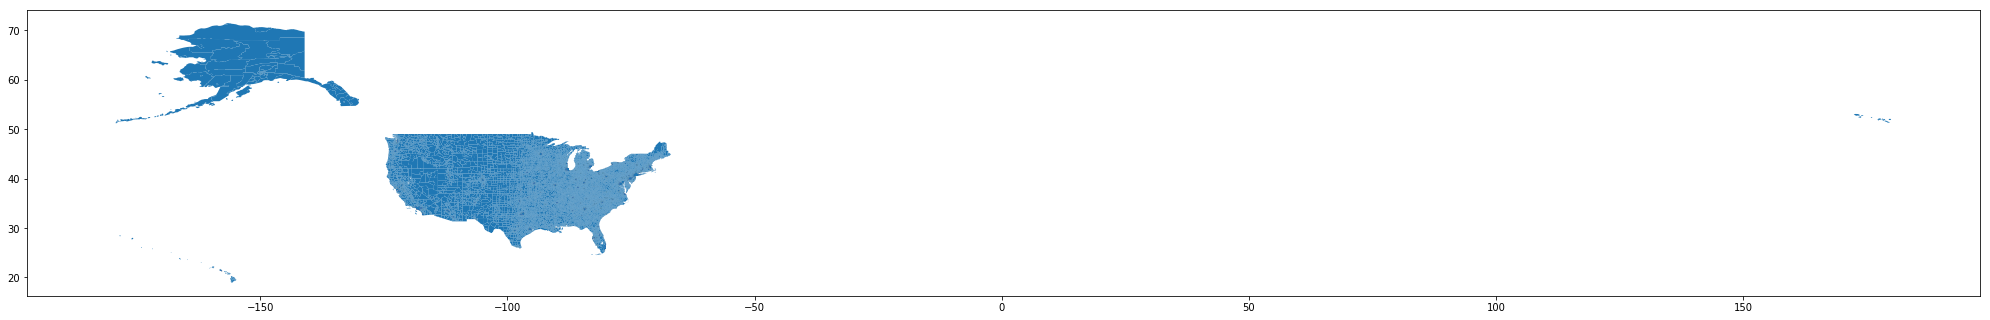

In [12]:
full_pop_2000.plot(figsize = (35, 35))

In [13]:
# Same function of tobler, but with an additional line that prints which line is processing

def area_tables(source_df, target_df):
    """
    Construct area allocation and source-target correspondence tables
    Parameters
    ----------
    source_df: geopandas GeoDataFrame with geometry column of polygon type
    source_df: geopandas GeoDataFrame with geometry column of polygon type
    Returns
    -------
    tables: tuple (optional)
            two 2-D numpy arrays
            SU: area of intersection of source geometry i with union geometry j
            UT: binary mapping of union geometry j to target geometry t
    Notes
    -----
    The assumption is both dataframes have the same coordinate reference system.
    Union geometry is a geometry formed by the intersection of a source geometry and a target geometry
    SU Maps source geometry to union geometry, UT maps union geometry to target geometry
    """
    n_s = source_df.shape[0]
    n_t = target_df.shape[0]
    _left = np.arange(n_s)
    _right = np.arange(n_t)
    source_df.loc[:, '_left'] = _left  # create temporary index for union
    target_df.loc[:, '_right'] = _right # create temporary index for union
    res_union = gpd.overlay(source_df, target_df, how='union')
    n_u, _ = res_union.shape
    SU = np.zeros((n_s, n_u)) # holds area of intersection of source geom with union geom
    UT = np.zeros((n_u, n_t)) # binary table mapping union geom to target geom
    for index, row in res_union.iterrows():
        # only union polygons that intersect both a source and a target geometry matter 
        
        print('Processing {} polygon out of {}.'.format(index, len(res_union)), end = "\r")
        
        if not np.isnan(row['_left']) and not np.isnan(row['_right']):
            s_id = int(row['_left'])
            t_id = int(row['_right'])
            SU[s_id, index] = row['geometry'].area
            UT[index, t_id] = 1
    source_df.drop(['_left'], axis=1, inplace=True)
    target_df.drop(['_right'], axis=1, inplace=True)
    return SU, UT

In [14]:
len(full_pop_2000)

72693

In [15]:
len(df_1990)

61332

In [27]:
# Really time consuming! Specially because of the inner overlay of the maps.
resulting_table = area_tables(full_pop_2000, df_1990)

In [ ]:
# In other words, it's unfeasible to run this:
# len(gpd.overlay(full_pop_2000, df_1990, how='union'))